# Initializing config, dataset and the oracle

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dataset import Config, Dataset
from oracle import Oracle
from active_learning import Learner

config = Config(70, 10)
data = Dataset(config)
orac_lc = Oracle(data, config)
orac_ms = Oracle(data, config)
orac_h = Oracle(data, config)

# Visualizing the digit dataset after PCA

In [3]:
from sklearn.decomposition import PCA

# Define our PCA transformer and fit it onto our raw dataset.
pca = PCA(n_components=2, random_state=2)
decomposed_digit = pca.fit_transform(X = data.x_raw)

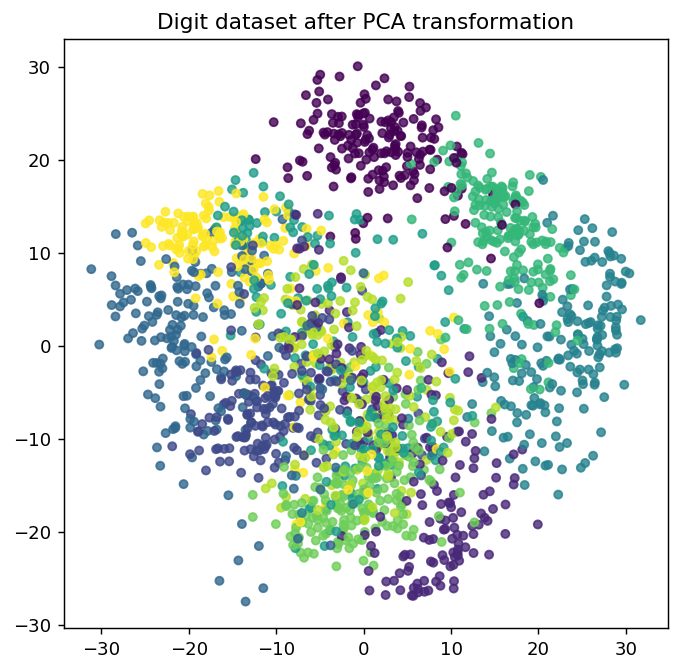

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Isolate the data we'll need for plotting.
x_component, y_component = decomposed_digit[:, 0], decomposed_digit[:, 1]

test_c1, test_c2 = [], []
for i in range(len(data.test_indices)):
    test_c1.append(x_component[data.test_indices[i]])
    test_c2.append(y_component[data.test_indices[i]])

# Plot our dimensionality-reduced (via PCA) dataset.
plt.figure(figsize=(6, 6), dpi=130)
plt.scatter(x = x_component, y = y_component, c = data.y_raw, cmap = 'viridis', s = 20, alpha = 8/10)
plt.title('Digit dataset after PCA transformation')
plt.show()

# Instantiating a Learner instance

In [5]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, probability=True)
least_count_learner = Learner([clf], "uncertainty", uncertainty = "lc")

# Initial training for the active learners

In [6]:
least_count_learner.train(orac_lc)
initial_pred_lc = least_count_learner.predict(data.test_X)

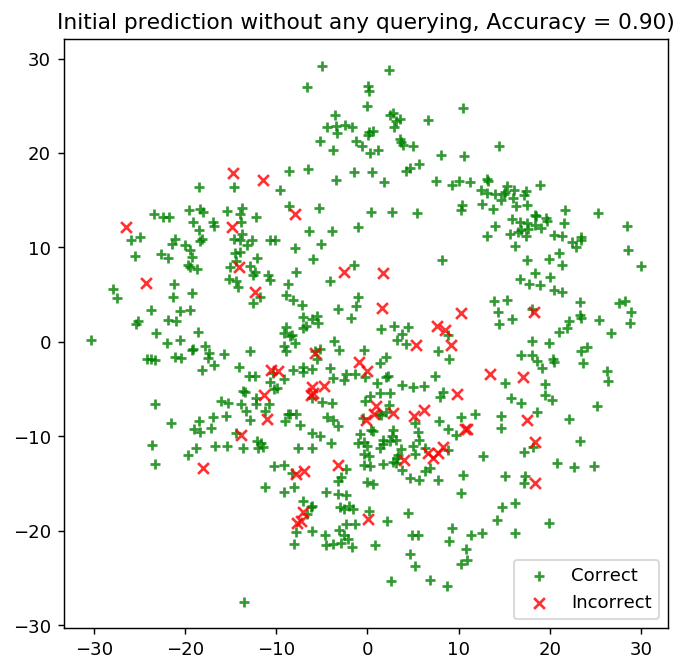

In [7]:
import numpy as np

is_correct = (initial_pred_lc == np.array(data.test_Y))

fig, ax1 = plt.subplots(figsize=(6, 6), dpi=130)
fig.suptitle = "Initial prediction without any querying"

ax1.scatter(x=np.array(test_c1)[is_correct],  y=np.array(test_c2)[is_correct],  c='g', marker='+', label='Correct',   alpha=8/10)
ax1.scatter(x=np.array(test_c1)[~is_correct], y=np.array(test_c2)[~is_correct], c='r', marker='x', label='Incorrect', alpha=8/10)
ax1.legend(loc='lower right')
ax1.set_title("Initial prediction without any querying, Accuracy = {score:.2f})".format(score=least_count_learner.test_score(data)))

plt.show()

In [8]:
import random
from math import floor

lst = list(range(len(orac_lc.pool_X)))
cluster_indices = random.sample(lst, floor(config.cluster_prop * len(orac_lc.pool_X)))

cluster_X = [orac_lc.pool_X[idx] for idx in cluster_indices]
cluster_Y = [orac_lc.pool_Y[idx] for idx in cluster_indices]

transformed_coords = pca.fit_transform(X = cluster_X)

# Before clustering

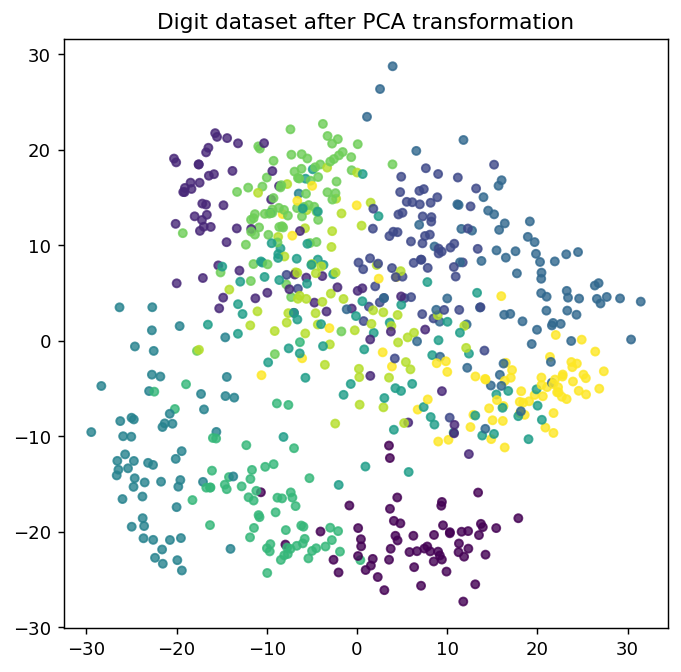

In [9]:
# Plot our dimensionality-reduced (via PCA) dataset.
plt.figure(figsize=(6, 6), dpi=130)
plt.scatter(x = transformed_coords[:,0], y = transformed_coords[:,1], c = cluster_Y, cmap = 'viridis', s = 20, alpha = 8/10)
plt.title('Digit dataset after PCA transformation')
plt.show()

# Performing clustering

In [10]:
from sklearn.cluster import KMeans
# Specify model for clustering
kmeans = KMeans(n_clusters = config.num_clusters, random_state=0).fit(cluster_X)
#clustering ouput
kmeans.labels_

array([6, 5, 0, 1, 1, 7, 8, 2, 8, 0, 8, 6, 7, 5, 3, 7, 8, 1, 1, 0, 6, 3,
       7, 1, 7, 5, 7, 6, 0, 8, 6, 5, 3, 9, 6, 9, 8, 8, 3, 6, 5, 1, 4, 7,
       1, 1, 5, 6, 1, 5, 9, 8, 7, 2, 5, 8, 3, 9, 3, 4, 9, 4, 0, 8, 9, 1,
       1, 0, 1, 4, 6, 2, 5, 2, 1, 6, 5, 6, 5, 9, 5, 1, 5, 1, 3, 0, 0, 5,
       8, 9, 9, 5, 0, 8, 3, 1, 1, 8, 3, 2, 2, 4, 8, 0, 7, 1, 4, 5, 7, 5,
       0, 9, 7, 0, 7, 4, 9, 1, 6, 8, 0, 1, 4, 0, 5, 4, 8, 9, 1, 4, 4, 3,
       4, 9, 2, 5, 7, 5, 1, 1, 0, 1, 0, 1, 0, 8, 4, 4, 5, 2, 4, 8, 8, 1,
       5, 8, 0, 0, 9, 9, 9, 9, 5, 0, 2, 8, 6, 8, 5, 2, 1, 3, 9, 8, 0, 1,
       7, 5, 4, 6, 2, 5, 3, 8, 8, 6, 4, 8, 9, 3, 5, 3, 2, 8, 8, 9, 4, 1,
       4, 7, 9, 8, 2, 1, 0, 0, 5, 1, 6, 7, 1, 1, 5, 2, 8, 6, 8, 9, 7, 6,
       5, 3, 5, 6, 6, 9, 1, 5, 4, 8, 9, 0, 6, 1, 9, 5, 2, 8, 1, 5, 4, 2,
       2, 5, 0, 4, 3, 5, 6, 4, 4, 3, 8, 0, 9, 1, 8, 0, 2, 8, 8, 1, 5, 1,
       1, 9, 8, 1, 1, 4, 0, 1, 1, 8, 7, 8, 3, 1, 3, 8, 0, 3, 0, 6, 8, 9,
       5, 2, 8, 2, 5, 2, 9, 8, 3, 3, 4, 4, 3, 7, 8,

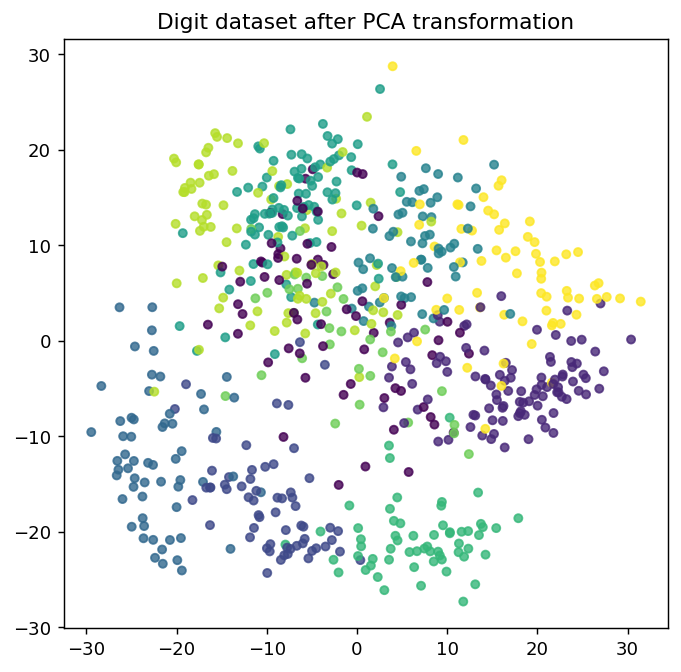

In [11]:
# Plot our dimensionality-reduced (via PCA) dataset.
plt.figure(figsize=(6, 6), dpi=130)
plt.scatter(x = transformed_coords[:,0], y = transformed_coords[:,1], c = kmeans.labels_, cmap = 'viridis', s = 20, alpha = 8/10)
plt.title('Digit dataset after PCA transformation')
plt.show()

# Labeling the points using cluster majority label

In [12]:
clusters = []
targets = []
cluster_rep = []
assigned_label = []

for i in range(config.num_clusters):
    clusters.append(np.array(cluster_X)[kmeans.labels_ == i])
    targets.append(np.array(cluster_Y)[kmeans.labels_ == i])

In [20]:
labeled_points = 0
total_points = 0
for i in range(config.num_clusters):
    cluster_rep.append(np.random.choice(clusters[i].shape[0], floor(0.2*clusters[i].shape[0]), replace = False))
    labeled_points += floor(0.2*clusters[i].shape[0])
    total_points += clusters[i].shape[0]
    labels = targets[i][cluster_rep[i]]
    
    (values, counts) = np.unique(labels, return_counts=True)
    ind = np.argmax(counts)
    assigned_label.append(values[ind])
print(assigned_label)
print("The number of points labeled by the model are: " + str(labeled_points))

[5, 9, 6, 4, 2, 7, 0, 1, 1, 3, 5, 9, 6, 4, 2, 7, 0, 1, 1, 3, 5, 9, 6, 4, 2, 7, 0, 1, 1, 3]
The number of points labeled by the model are: 131


In [14]:
X = cluster_X
Y = np.zeros(len(cluster_X))

for i in range(config.num_clusters):
    Y[kmeans.labels_ == i] = assigned_label[i]

In [15]:
clf.fit(np.array(X), Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [16]:
print('Accuracy: {acc:0.4f}'.format(acc=clf.score(data.test_X, data.test_Y)))

Accuracy: 0.7741


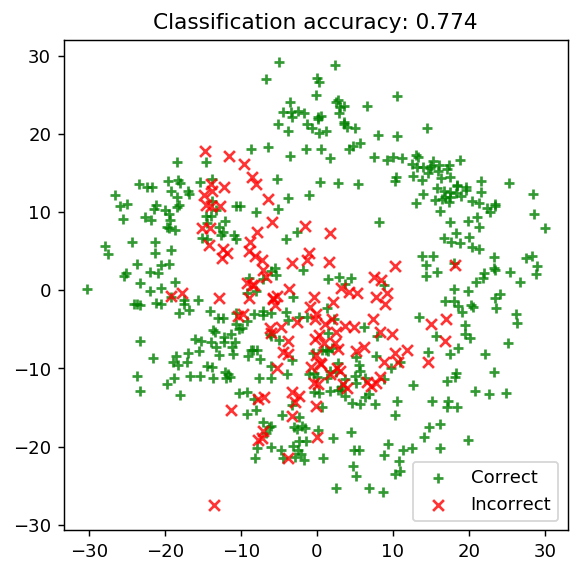

In [17]:
# Isolate the data we'll need for plotting.
predictions = clf.predict(data.test_X)
is_correct = (predictions == data.test_Y)

# Plot our updated classification results once we've trained our learner.
fig, ax = plt.subplots(figsize=(5, 5), dpi=130)

ax.scatter(x=np.array(test_c1)[is_correct],  y=np.array(test_c2)[is_correct],  c='g', marker='+', label='Correct',   alpha=8/10)
ax.scatter(x=np.array(test_c1)[~is_correct], y=np.array(test_c2)[~is_correct], c='r', marker='x', label='Incorrect', alpha=8/10)

ax.set_title('Classification accuracy: {final_acc:.3f}'.format(final_acc=clf.score(data.test_X, data.test_Y)))
ax.legend(loc='lower right')

plt.show()